In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price.

    S: Current stock price
    K: Strike price
    T: Time to expiration (in years)
    r: Risk-free interest rate (annual)
    sigma: Volatility (annual)
    option_type: 'call' for call option, 'put' for put option

    Returns the option price.
    """
    d1 = (np.log(S / K) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# Example usage
stock_price = 100  # Current stock price
strike_price = 100  # Strike price
time_to_expiry = 1  # Time to expiration in years
risk_free_rate = 0.05  # Annual risk-free interest rate
volatility = 0.2  # Annual volatility

call_option_price = black_scholes(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, option_type='call')
put_option_price = black_scholes(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, option_type='put')

print(f"Call Option Price: {call_option_price}")
print(f"Put Option Price: {put_option_price}")

Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971


In [ ]:
# After calculating the actual option prices using Zerodha - Black & Scholes Calculator, we get
call_option_price_e = 10.49
put_option_price_e = 5.58# After calculating the actual option prices using Zerodha - Black & Scholes Calculator, we get
call_option_price_e = 10.49
put_option_price_e = 5.58

In [ ]:
# Accuracy(in %) :-
call_option_price_accuracy = abs(call_option_price - call_option_price_e) * 100
put_option_price_accuracy = abs(# Accuracy(in %) :-
call_option_price_accuracy = abs(call_option_price - call_option_price_e) * 100
put_option_price_accuracy = abs(put_option_price - put_option_price_e) * 10

In [ ]:
print(call_option_price_accuracy)
print(put_option_price_accuracy)

3.941642781443555
0.0647397774302938


Difference:  5 days, 23:45:00
Total difference in minutes:  8625.0
Total difference in years:  0.016409817351598174
Option pricing for strike price: 17700
CALL Option  Value is:  6.91
PUT option value is: 137.89
The Execution Time is:  0.21221232414245605


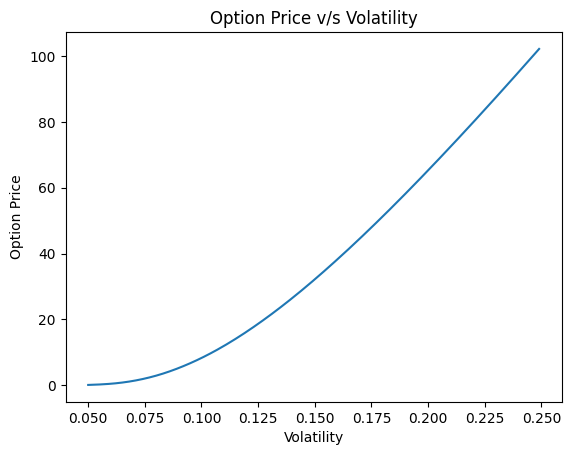

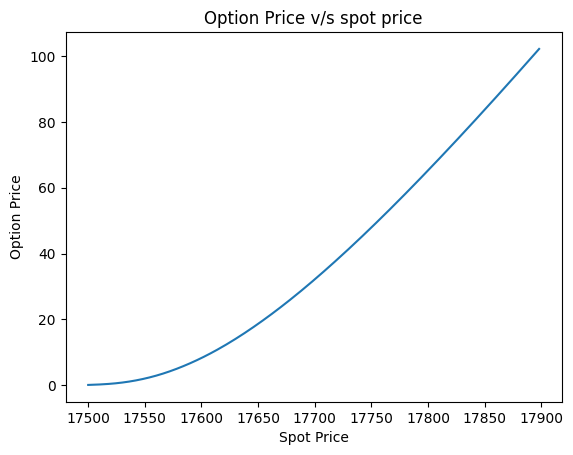

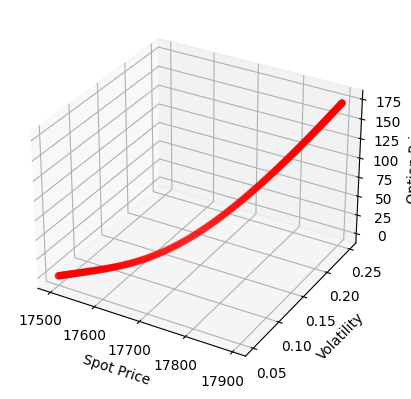

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[13]:


import math
from numpy import *
from time import time
# star import for shorter code
random.seed(600000)
t0 = time()

import datetime
#           datetime(year, month, day, hour, minute, second)
a_R = datetime.datetime(2022, 8, 18, 15, 15, 0)
b_R = datetime.datetime(2022, 8, 12, 15, 30, 0)

# returns a timedelta object
c_R = a_R-b_R
print('Difference: ', c_R)
minutes = c_R.total_seconds() / 60
print('Total difference in minutes: ', minutes)
time_Difference = minutes/(24*60*365)
print('Total difference in years: ', time_Difference)


# In[14]:


# Parameters
S0 = 17540.00; K = 17700 ; T = time_Difference ; r = 0.1 ; sigma = 0.05
M = 60; dt = T / M; I = 60000
# Simulating I paths with M time steps
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
+ sigma * math.sqrt(dt)
* random.standard_normal((M + 1, I)), axis=0))
# sum instead of cumsum would also do
# if only the final values are of interest
S[0] = S0
# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I
# Results output
tnp2 = time() - t0

#change
#round of and put call perity
#put call parity for calculate option price of put option.
Put_option_price = C0 - S0 + K*exp(-r*T)

C0 = round(C0, 2)
Put_option_price = round(Put_option_price,2)

print('Option pricing for strike price:', K)
print('CALL Option  Value is: ', C0)
print('PUT option value is:', Put_option_price)
print('The Execution Time is: ',tnp2)


# In[15]:


# Function to calculate the variation of Option Price with Volatility
def myfu(sigma):

    # star import for shorter code
    random.seed(600000)
    t0 = time()

    import datetime
    #           datetime(year, month, day, hour, minute, second)
    a_R = datetime.datetime(2022, 8, 18, 15, 15, 0)
    b_R = datetime.datetime(2022, 8, 12, 15, 30, 0)

    # returns a timedelta object
    c_R = a_R-b_R
#    print('Difference: ', c_R)
    minutes = c_R.total_seconds() / 60
#    print('Total difference in minutes: ', minutes)
    time_Difference = minutes/(24*60*365)
#    print(time_Difference)
    # Parameters
    S0 = 17698.00; K = 18050 ; T = time_Difference ; r = 0.1 ;
    M = 60; dt = T / M; I = 60000
    # Simulating I paths with M time steps
    S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
    + sigma * math.sqrt(dt)
    * random.standard_normal((M + 1, I)), axis=0))
    # sum instead of cumsum would also do
    # if only the final values are of interest
    S[0] = S0
    # Calculating the Monte Carlo estimator
    C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I
    # Results output
    tnp2 = time() - t0
    return C0


# In[16]:


x = []
num=0.05
for i in range(200):
    x.append(num)
    num=num+0.001


# In[17]:


y=[]
calc=0
for i in range(200):
    calc=myfu(x[i])
    y.append(calc)


# In[18]:


import matplotlib.pyplot as plt

plt.plot(x, y)
# naming the x axis
plt.xlabel('Volatility')
# naming the y axis
plt.ylabel('Option Price')

# giving a title to my graph
plt.title('Option Price v/s Volatility')

# function to show the plot
plt.show()


# In[19]:


# Function to calculate the variation of Option Price with Spot Price
def myfu(S0):

    # star import for shorter code
    random.seed(600000)
    t0 = time()

    import datetime
    #           datetime(year, month, day, hour, minute, second)
    a_R = datetime.datetime(2022, 8, 18, 15, 15, 0)
    b_R = datetime.datetime(2022, 8, 12, 15, 30, 0)

    # returns a timedelta object
    c_R = a_R-b_R
#    print('Difference: ', c_R)
    minutes = c_R.total_seconds() / 60
#    print('Total difference in minutes: ', minutes)
    time_Difference = minutes/(24*60*365)
#    print(time_Difference)
    # Parameters
    K = 17700 ; T = time_Difference ; r = 0.1 ; sigma = 0.05
    M = 60; dt = T / M; I = 60000
    # Simulating I paths with M time steps
    S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
    + sigma * math.sqrt(dt)
    * random.standard_normal((M + 1, I)), axis=0))
    # sum instead of cumsum would also do
    # if only the final values are of interest
    S[0] = S0
    # Calculating the Monte Carlo estimator
    C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I
    # Results output
    tnp2 = time() - t0
    return C0


# In[20]:


x = []
num= 17500
for i in range(200):
    x.append(num)
    num=num+2


# In[21]:


x = []
num= 17500
for i in range(200):
    x.append(num)
    num=num+2


# In[22]:


import matplotlib.pyplot as plt

plt.plot(x, y)
# naming the x axis
plt.xlabel('Spot Price')
# naming the y axis
plt.ylabel('Option Price')

# giving a title to my graph
plt.title('Option Price v/s spot price')

# function to show the plot
plt.show()


# In[1]:



# Function to calculate the variation of Option Price with Volatility and Spot-Price

def myfu(sigma,S0):

    # star import for shorter code
    random.seed(600000)
    t0 = time()

    import datetime
    #           datetime(year, month, day, hour, minute, second)
    a_R = datetime.datetime(2022, 8, 18, 15, 15, 0)
    b_R = datetime.datetime(2022, 8, 12, 15, 30, 0)

    # returns a timedelta object
    c_R = a_R-b_R
#    print('Difference: ', c_R)
    minutes = c_R.total_seconds() / 60
#    print('Total difference in minutes: ', minutes)
    time_Difference = minutes/(24*60*365)
#    print(time_Difference)
    # Parameters
    K = 18050 ; T = time_Difference ; r = 0.1 ;
    M = 60; dt = T / M; I = 60000
    # Simulating I paths with M time steps
    S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
    + sigma * math.sqrt(dt)
    * random.standard_normal((M + 1, I)), axis=0))
    # sum instead of cumsum would also do
    # if only the final values are of interest
    S[0] = S0
    # Calculating the Monte Carlo estimator
    C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I
    # Results output
    tnp2 = time() - t0
    return C0


# In[2]:


x = []
num= 17500
for i in range(200):
    x.append(num)
    num=num+2


# In[25]:


y = []
num=0.05
for i in range(200):
    y.append(num)
    num=num+0.001


# In[26]:


z=[]
calc=0
for i in range(200):
    calc=myfu(y[i],x[i])
    z.append(calc)


# In[28]:


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Spot Price')
ax.set_ylabel('Volatility')
ax.set_zlabel('Option Price')

plt.show()


# In[ ]:

